## Прогнозы и предсказания

### Задача

Сеть фитнес-центров  разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных. Чтобы бороться с оттоком, отдел по работе с клиентами  перевёл в электронный вид множество анкет пользователей.  Задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
Спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
Сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
Проанализировать основные признаки, наиболее сильно влияющие на отток;
Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
- выделить целевые группы клиентов;
- предложить меры по снижению оттока;
- определить другие особенности взаимодействия с клиентами.

### Проведем исследовательский анализ данных

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from matplotlib.ticker import FuncFormatter
from sklearn.tree import DecisionTreeClassifier

In [11]:
logs = pd.read_csv('/datasets/gym_churn.csv')

In [12]:
logs

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [13]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [14]:
print(logs.isnull().sum())

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


#### Посмотрим на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения

In [15]:
logs.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


#### Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [16]:
churn = logs.groupby('Churn').agg('mean')

In [17]:
churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


 Признаки численные.  Категориальных прознаков нет. С пропусками тоже всё хорошо, их нет. Данные чистые

#### Построим матрицу корреляций и отобразим её:

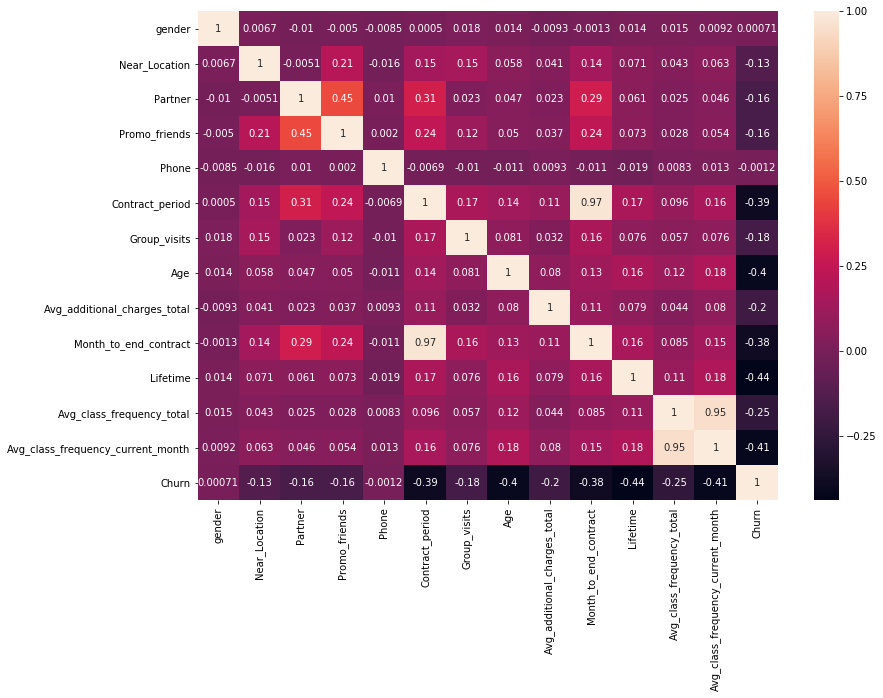

In [18]:
#построим и отрисуем матрицу корреляций
cm = logs.corr() #вычисляем матрицу корреляций
plt.figure(figsize=(13, 9))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot = True)

plt.show()

Если смотреть на зависимость между целевой переменной и признаками, то можем увидить, что только в 5 признаках имеется корреляция примерно равная 0,4, в остальны же случаях это значение меньше, а значит в связи очень слабые

#### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток):

Разделим данные на тех, кто ушел в отток (logs_1) и тех кто остался (logs_0):

In [19]:
logs_0 = logs.query('Churn == 0')
logs_1 = logs.query('Churn == 1')

Построим гистограммы и диаграммы рассеяния для признак-целевая переменная для признков, красным будут выделены пользователи, которые ушли, синим пользователи, которые не попали в отток:

Near_Location


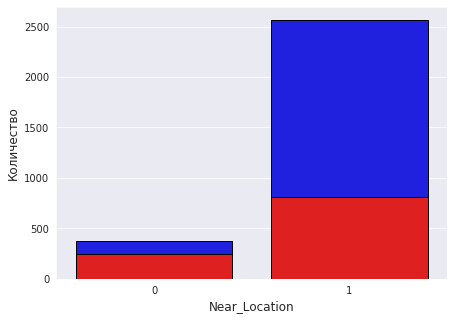

gender


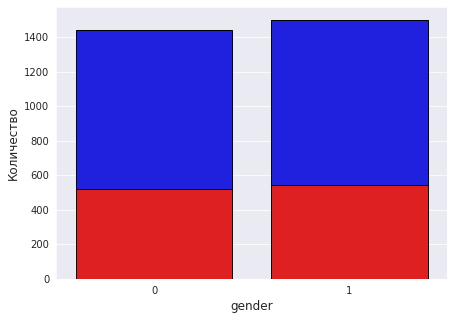

Partner


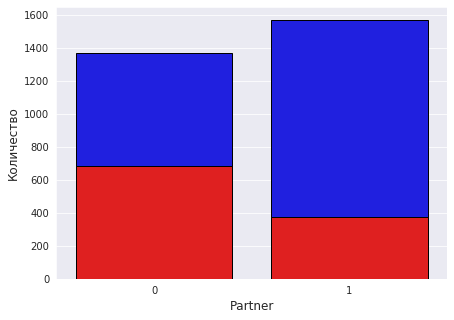

Promo_friends


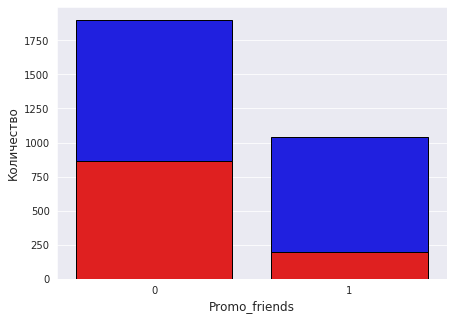

Phone


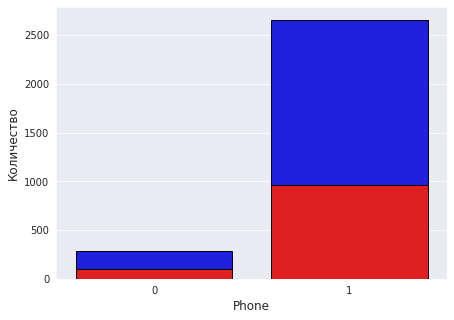

Lifetime


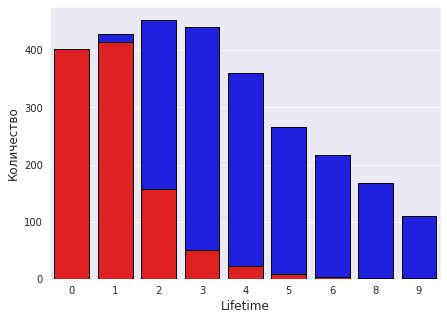

Age


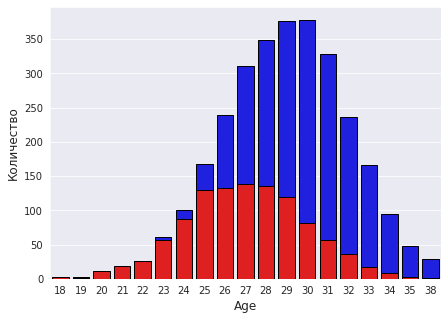

Contract_period


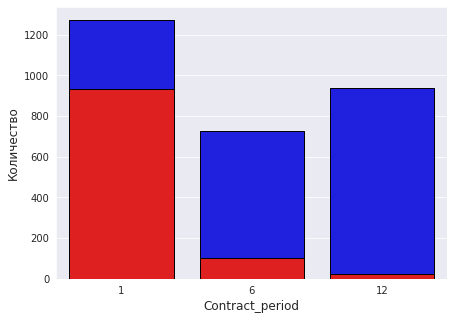

Month_to_end_contract


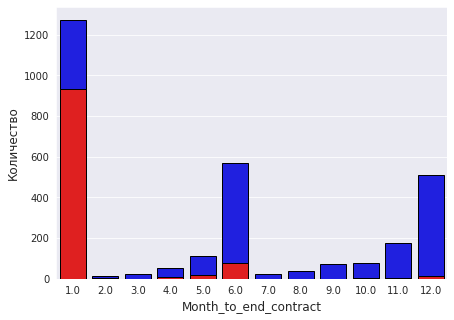

Group_visits


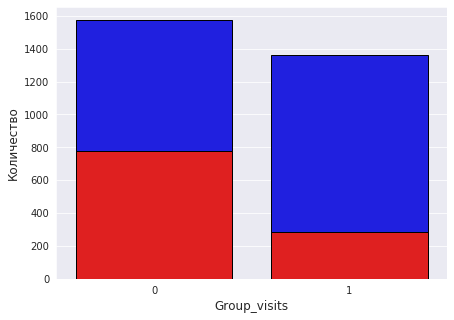

In [20]:
column_list1 = ['Near_Location', 'gender', 'Partner', 'Promo_friends', 'Phone', 'Lifetime', 'Age', 'Contract_period', 'Month_to_end_contract', 'Group_visits']
for i in column_list1:
    
    print(i)
    
    df_0 = logs_0.groupby(i).agg({'Churn': 'count'}).reset_index()
    df_1 = logs_1.groupby(i).agg({'Churn': 'count'}).reset_index()
    
    sns.set_style("darkgrid")
    plt.figure(figsize=(7,5))
    
    
    sns.barplot(x=i, y="Churn", color = 'blue', ec='black', data=df_0)
    sns.barplot(x=i, y="Churn", color = 'red', ec='black', data=df_1)
    plt.ylabel('Количество', fontsize='12')
    plt.xlabel(i, fontsize='12')
    
    
    
    
    plt.show()

 Признаки:
 - 'Near_Location' можем заметить, что большое количество пользователей, у которых проживание или работа в районе, где находится фитнес-центр остались клиентами фитнес центра, из пользователей, которые попали в категорию оттока, большое количество проживало далеко от фитнес центра это видно из диаграммы
 - 'Gender' если смотреть по гендерному признаку то, каких-то различий по этому признаку у тех, кто ушёл (отток) и тех, кто остался (не попали в отток) не обнаружено
 - 'Partner' пользователи ,которые не имеют партнерства имеют большую склонность покидать фитнесклуб, это заметно по диаграмме, что в отток попало около половины от тех пользователей, которые не попали в отток не имеющие партнерство
 - 'Promo_friends' люди пришедшие по рекомендации друзей уходят реже, возможно у них есть мотивирующий их друг и они решают не покидать фитнес клуб
 - 'Lifetime' можно заметить, что для пользователи проходившие до 2 месяцев имеют большой шанс к уходу, это видно по диаграмме, после 2 месяцев этот показатель резко падает
 - 'Age' как ни странно чем страрше человек, тем реже он бросает занятия фитнесом
 - 'Contract_period' чем больше длительность текущего действующего абонемента, тем меньше фанс того,что клиент попадет в отток
 - 'Month_to_end_contract' как ни странно, но когда остается месяц люди перестают ходить в фитнес клуб, небольшойвсплест оттока клиентов имеется на отметке в 6 месяцев
 - 'Group_visit' если люди , посещают дополнительные занятия, то они более ответственно относятся к занятиям и имеют большую мотивацию к продолжению тренировок

Avg_class_frequency_total


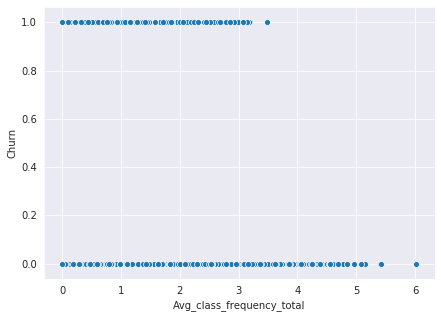

Avg_class_frequency_current_month


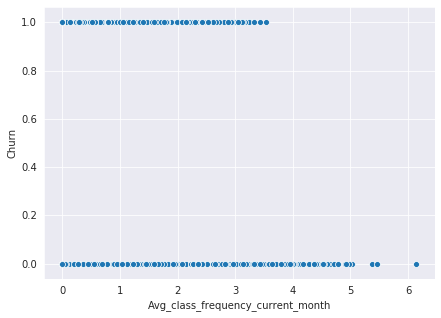

Avg_additional_charges_total


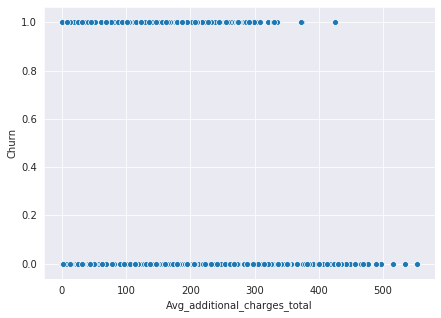

In [21]:
for i in ['Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Avg_additional_charges_total']:
    
    print(i)
    
    sns.set_style("darkgrid")
    plt.figure(figsize=(7,5))
    
    sns.scatterplot(logs[i], logs['Churn'])
    
    plt.show()

Тут моно сделать вывод, что чем чаще пользователи посещают клуб или чем больше приобретают дополнительные услуги, тем они реже уходят из фитнес клуба

### Построим модель прогнозирования оттока пользователей

In [26]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score

Разделим наши данные на признаки (матрица X) и целевую переменную (y):

In [27]:
#logs

In [28]:
X = logs.drop('Churn', axis = 1)
y = logs['Churn']

Разделяем модель на обучающую и валидационную выборку:

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Обучим StandartScaler на обучающей выборке:

In [30]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

Преобразуйте обучающий и валидационные наборы данных:

In [31]:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Зададим алгоритм для модели логистической регрессии:

In [32]:
lr_model = LogisticRegression()

Обучим модель:

In [33]:
lr_model.fit(X_train_st, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Воспользуемся уже обученной моделью, чтобы сделать прогнозы

In [34]:
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

Определим функцию, которая будет выводить наши метрики:

In [35]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

Зададим алгоритм для новой модели на основе алгоритма случайного леса:

In [36]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

Обучим модель случайного леса:

In [37]:
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Воспользуемся уже обученной моделью, чтобы сделать прогнозы:

In [38]:
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

Выведем все метрики:

In [39]:
print_all_metrics(y_test, rf_predictions, rf_probabilities, title='Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1: 0.83
	ROC_AUC: 0.97


In [40]:
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97


По итогу получили, что метрики не намного , но лучше в случае выбора модели случайного леса в сравнение с более простой моделью логистической регрессии

 ### Сделайте кластеризацию пользователей

In [41]:
import pandas as pd
 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

Выполним стандартизацию и передадим получившуюся стандартизированную таблицу в качестве параметра функции linkage():

In [42]:
sc = StandardScaler()
x_sc = sc.fit_transform(logs.drop(columns = ['Churn']))

In [43]:
linked = linkage(x_sc, method = 'ward')

В переменной linked сохранена таблица «связок» между объектами. Её можно визуализировать как дендрограмму:

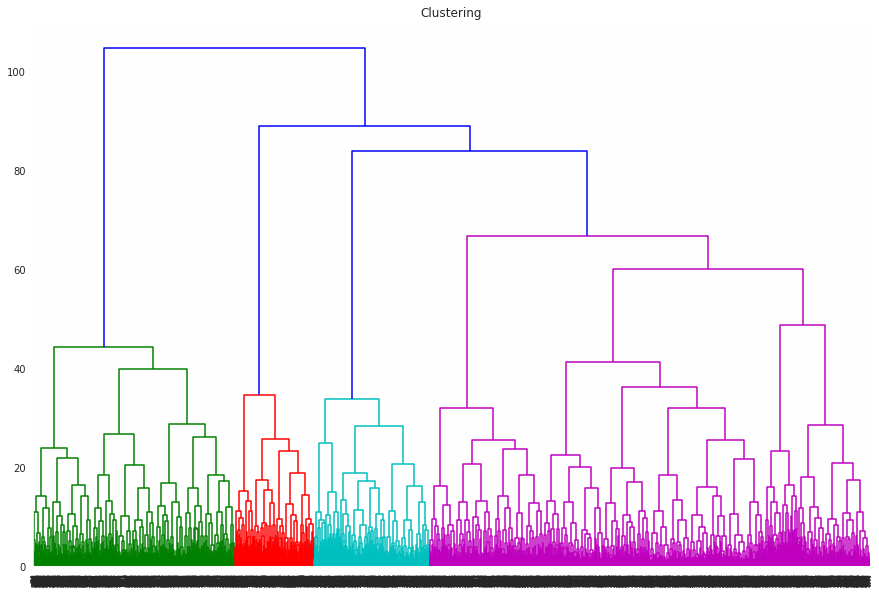

In [44]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Clustering')
plt.show()

Судя по дендрограмме можно выделить 4 кластера

#### Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов:

Задаём число кластеров, равное 5, применяем алгоритм к данным и формируем вектор кластеров:

In [45]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(x_sc)

Сохраняем метки кластера в поле датасета:

In [46]:
logs['cluster'] = labels

Выводим статистику по средним значениям признаков по кластеру:

In [47]:
logs_avg = logs.groupby(['cluster']).mean()

In [48]:
logs_avg

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.496063,0.000000,0.460630,0.078740,1.0,2.375984,0.218504,28.486220,135.544499,2.222441,2.811024,1.666510,1.485248,0.440945
1,0.501478,0.960591,0.782266,0.574384,1.0,10.882759,0.540887,29.979310,160.817799,9.944828,4.723153,1.996640,1.989817,0.027586
2,0.488655,1.000000,0.352512,0.238250,1.0,1.965964,0.340357,28.147488,130.319935,1.875203,2.319287,1.234590,0.995871,0.522690
3,0.554259,0.978996,0.352392,0.232205,1.0,2.569428,0.471412,30.098016,162.437671,2.368728,5.010502,2.804776,2.800095,0.071179
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


#### Для каждого полученного кластера посчитаем долю оттока:

Сгруппируем данные:

In [49]:
share = logs.groupby('cluster').agg({'Churn': 'count'}).reset_index()

In [50]:
share.rename(columns={'Churn': 'count'}, inplace=True)

In [51]:
share_1 = logs.groupby('cluster').agg({'Churn': 'sum'}).reset_index()

In [52]:
share_1.rename(columns={'Churn': 'sum'}, inplace=True)

Объединим таблицы:

In [53]:
df = share.merge(share_1)

Найдем процент оттока по кластерам:

In [54]:
df['%'] = df['sum'] / df['count']*100
df.sort_values(by=('%'), ascending = False).round(1)

,cluster,count,sum,%
2,2,1234,645,52.3
0,0,508,224,44.1
4,4,386,103,26.7
3,3,857,61,7.1
1,1,1015,28,2.8


В двух кластерах имеем маленький процент оттока клиентов для кластеров 1 и 2 и большой процент оттока окло 50% для 3 и 0 кластера

Построим распределения признаков для кластеров:

Avg_class_frequency_total


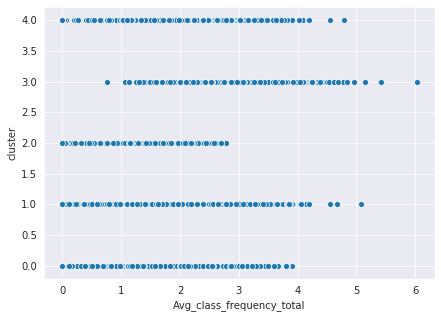

Avg_class_frequency_current_month


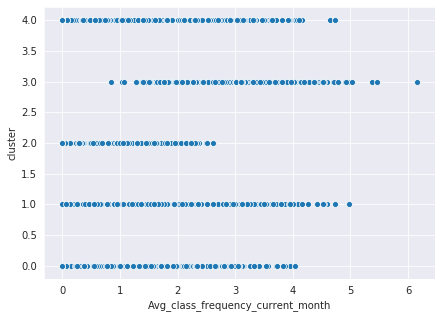

Avg_additional_charges_total


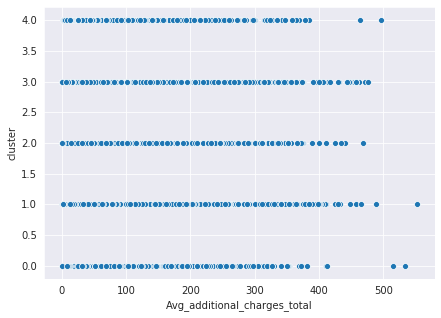

In [55]:
for i in ['Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Avg_additional_charges_total']:
    
    print(i)
    
    sns.set_style("darkgrid")
    plt.figure(figsize=(7,5))
    
    sns.scatterplot(logs[i], logs['cluster'])
    
    plt.show()

Мы видим, что в тех кластерах, для которых большой процент оттока пользователей проседает и по признакам, так в кластере 0 и 3 посещают занятия реже нежели, в тех кластерах, которые более надежны и имеют низких процент оттока, тоже самое проявляется и для других признаков

## Вывод:

Для удержания клиентов на мой взгляд нужно более правильно выбирать место положение клуба, например в каких-то спальных районах или возле бизнес центров, для того, чтобы пользователи имели в непосредственной близости фитнес центр, либо открывать как можно больше клубов, если есть такая возможность. Так же, как можно заметить, чем большая вовеченность пользователя в фитнес индустрию, это выражается в таких признаках, как количество посещений клуба или групповых занятий и приобретение, какой-либо продукции, тем меньше вероятность потерять клиента, поэтому нужно мотивировать клиента к занятиям, путем проведения агитационных каких-то мероприятий, реклама занятий с тренером и какого-либо продукта продаваемого клубом, возможно небольшие соревнования среди клиентов. Еще один из признаков посещения фитнес центра это длительность текущего действующего абонемента, это значит, что чем на больший срок приобретается абонемент, тем с большей вероятностью клиент останется, возможно это связано с тем, что такие абонементы стоят не дешево и просто так потерять такую сумму никто не хочет, поэтому фитнес центру необходимо проводить акции на различных более выгодных условиях для долгосрочных абонементов.